<a href="https://colab.research.google.com/github/Raghuramas94/PROJECT-1/blob/master/Raghuram_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing KERAS

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


Importing the necessary libraries

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization
from keras.utils import np_utils
from keras import optimizers

from keras.datasets import mnist

downloading the data from MNIST to train and test splits

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Plotting the data from MNIST

(60000, 28, 28)


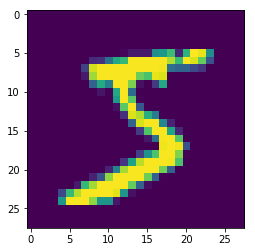

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

Normalizing the input

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

Convolution Layer 

In [26]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
#model.add(Dropout(0.1))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 13))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


printing the summary of the model

In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_5 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 10)        330       
_________________________________________________________________
batch_normalization_6 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 10)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 1, 1, 10)          16910     
__________

defining the optimizer and learning rate

In [0]:
sgd = optimizers.SGD(lr=0.009, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)

compiling the model

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

Model training 

In [44]:
model.fit(X_train, Y_train, batch_size=16, nb_epoch=20, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/20
60000/60000 [==============================] - 17s 279us/step - loss: 0.0146 - acc: 0.9951
Epoch 2/20
60000/60000 [==============================] - 17s 281us/step - loss: 0.0167 - acc: 0.9941
Epoch 3/20
60000/60000 [==============================] - 17s 284us/step - loss: 0.0160 - acc: 0.9940
Epoch 4/20
60000/60000 [==============================] - 16s 271us/step - loss: 0.0160 - acc: 0.9942
Epoch 5/20
60000/60000 [==============================] - 16s 272us/step - loss: 0.0167 - acc: 0.9943
Epoch 6/20
60000/60000 [==============================] - 16s 271us/step - loss: 0.0162 - acc: 0.9943
Epoch 7/20
60000/60000 [==============================] - 17s 284us/step - loss: 0.0157 - acc: 0.9947
Epoch 8/20
60000/60000 [==============================] - 17s 278us/step - loss: 0.0148 - acc: 0.9947
Epoch 9/20
60000/60000 [==============================] - 18s 299us/step - loss: 0.0128 - acc: 0.9954
Epoch 10/20
60000/60000 [==============================] - 16s 269us/step - loss: 

In [45]:
model.fit(X_train, Y_train, batch_size=128, nb_epoch=30, verbose=1)

Epoch 1/30
 3200/60000 [>.............................] - ETA: 3s - loss: 0.0111 - acc: 0.9969

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 3s 45us/step - loss: 0.0085 - acc: 0.9973
Epoch 2/30
60000/60000 [==============================] - 3s 44us/step - loss: 0.0067 - acc: 0.9979
Epoch 3/30
60000/60000 [==============================] - 3s 44us/step - loss: 0.0059 - acc: 0.9981
Epoch 4/30
60000/60000 [==============================] - 3s 44us/step - loss: 0.0061 - acc: 0.9981
Epoch 5/30
60000/60000 [==============================] - 3s 44us/step - loss: 0.0055 - acc: 0.9984
Epoch 6/30
60000/60000 [==============================] - 3s 44us/step - loss: 0.0062 - acc: 0.9980
Epoch 7/30
60000/60000 [==============================] - 3s 44us/step - loss: 0.0053 - acc: 0.9985
Epoch 8/30
60000/60000 [==============================] - 3s 47us/step - loss: 0.0055 - acc: 0.9983
Epoch 9/30
60000/60000 [==============================] - 3s 48us/step - loss: 0.0053 - acc: 0.9983
Epoch 10/30
60000/60000 [==============================] - 3s 48us/step - loss: 0.0058 - acc: 0.9982
Epoch 11/3

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

evaluation on the test set

In [53]:
print(score)

[0.05322760308523439, 0.9864]


In [0]:
y_pred = model.predict(X_test)

In [49]:
print(y_pred[:9])
print(y_test[:9])

[[1.29987423e-16 1.52432151e-14 3.94099380e-12 2.23353960e-10
  1.28022974e-23 1.98960602e-19 2.23329259e-25 1.00000000e+00
  1.28760046e-16 1.31183093e-14]
 [3.14576108e-11 4.52591831e-09 9.99998569e-01 1.31595335e-15
  7.35183653e-18 3.73478168e-17 1.44708054e-06 1.22289193e-18
  3.08082065e-13 8.60734976e-16]
 [6.07494194e-11 9.99999762e-01 2.38697861e-09 3.18168538e-12
  1.62397612e-07 8.32430125e-10 7.89172547e-11 8.02952655e-08
  1.08418563e-08 1.06054391e-12]
 [1.00000000e+00 9.59074363e-17 1.22602941e-08 1.99189581e-15
  1.23690885e-16 1.08459472e-13 1.24250370e-08 7.62151979e-14
  2.12286514e-13 4.21249895e-13]
 [2.66379177e-13 9.32554950e-14 2.51442394e-13 3.59739495e-12
  9.99999881e-01 2.55307165e-16 2.24696997e-13 8.24639357e-10
  1.37088285e-10 1.30954291e-07]
 [4.09430267e-11 9.99995112e-01 1.32493649e-09 2.84434802e-13
  3.47016709e-07 1.81902280e-12 1.88551398e-14 4.54551764e-06
  4.61594363e-09 3.82034248e-12]
 [7.00277742e-25 1.80914948e-16 4.00441390e-16 7.60390940e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

printing the output and saving the weights

In [51]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored